# Week6 Random Simulation

## 背景描述  

设计一个模拟:实现欠拟合和过拟合对多元线性回归模型的影响。

在模拟中，我们可以定义$Bias^2_k,\ Var_k,\ MSE_k$分别为第 k 个线性回归模型的偏差平方、方差和均方误差。

## 数据描述

参数设置如下:

i. 样本量$n=300$;

ii. 变量维度 $(p, p_1) = (20, 10)$;

iii. 自变量的波动 $\sigma_x = 0.2$;

iv. 自变量的相依程度 $\rho_x = 0$;

v. 误差的波动 $\sigma_y = 3$;

vi. 预测点的位置 $\pmb{x}_0 = (1, \pmb{0.05}^′_{20})^′$;

vii. 重复次数 $M = 5000$

## 问题

(a) 在同一张图上采用三种颜色绘制$Bias^2_k$、$Var_k$ 和 $MSE_k$ 的三条曲线。

(b) 标示出 MSE 最小所对应的自变量个数。

## 解决方案

根据作业中给出的要求，编写python代码如下。首先加载相应的库函数。

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

然后定义重要的函数。其中，epsilon函數用於生成向量$\pmb{\epsilon}=(\epsilon_1,\epsilon_2,...,\epsilon_n)$，其中$\epsilon_i$独立同分布于正态分布$N(0,\sigma^2_y)$。y_real函數用於根據給定的beta和生成X並構造y向量，公式是$\pmb{y}=\pmb{X}\pmb{\beta}+\pmb{\epsilon}$，其中beta由參數指定，X在函數內部生成。

In [2]:
def epsilon(n): # 生成epsilon向量
    return np.mat([random.gauss(0,sig_y) for i in range(n)]).T

def y_real(beta, n): # 生成X和y 
    x = []
    for j in range(n):
        x_l = [random.gauss(0,sig_x) for i in range(p + 1)]
        x_l[0] = 1.0 # 生成矩阵X的每一行xi，第一列恒为1
        x.append(x_l)
    x = np.mat(x)
    y = np.matmul(x, beta) + epsilon(n) # y的计算公式
    return y, x

然后设置合适的参数并进行初始化，其中$\pmb{\beta}$的前$p_1$个分量的值為1，其餘的值為0。

In [3]:
n = 300
p = 20
p1 = int(p * 0.5)
sig_x = 0.2
sig_y = 3
x0 = [1 if i == 0 else 0.05 for i in range(p + 1)]
M = 5000 
beta = np.mat([1 if i <= p1 else 0 for i in range(p + 1)]).T
y0_e = np.matmul(x0, beta) # 这个变量是在计算偏差平方和均方误差时所需的x0beta
bia = [[] for i in range(p + 1)] # 记录每一次的y0_hat-x0beta
y0_hats = [[] for i in range(p + 1)] # 记录每一次的y0_hat

对于每一轮，利用公式$\hat{\pmb{\beta}}=(\pmb{X}'\pmb{X})^{-1}\pmb{X}'\pmb{y}$計算出$\hat{\pmb{\beta}}$的值，然後利用公式$\hat{y_0}^{(k)}=\pmb{x_0}'\hat{\pmb{\beta}}^{(k)}$計算出y0的估計值，然後把它和$\hat{y_0}^{(k)}-\pmb{x}_0'\pmb{\beta}$紀錄到列表中。

In [4]:
for m in range(M):
    y, x = y_real(beta,  n)
    re = np.matmul(x.T,x).I
    beta_hat = np.matmul(np.matmul(re,x.T),y)
    beta_hat_k = beta_hat
    for k in range(p + 1): # 每一次
        y0_hat = np.matmul(x0, beta_hat_k)
        bi = float(y0_hat - y0_e)
        bia[p - k].append(bi)
        y0_hats[p - k].append(float(y0_hat))
        beta_hat_k[p - k] = 0

最后计算出$Bias^2_k,\ Var_k,\ MSE_k$并打印出MSE的值和图表。

In [5]:
bias = []
mses = []
for k in range(p + 1):
    y0_hat_l = np.array(y0_hats[k])
    bis = np.array(bia[k])
    biask = float(y0_hat_l.mean() - y0_e)
    bias.append(biask * biask)
    mse = bis * bis
    mses.append(mse.mean())
print("MSE")
for k in range(p + 1):
    print(k, ':', round(mses[k], 4))

MSE
0 : 0.2819
1 : 0.2364
2 : 0.1952
3 : 0.1597
4 : 0.1298
5 : 0.1048
6 : 0.0847
7 : 0.0695
8 : 0.059
9 : 0.0535
10 : 0.0526
11 : 0.0544
12 : 0.057
13 : 0.0592
14 : 0.0609
15 : 0.0629
16 : 0.0643
17 : 0.0666
18 : 0.0683
19 : 0.0697
20 : 0.0717


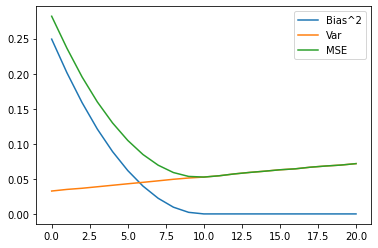

In [6]:
T = np.array([x for x in range(p+1)])
l1 = np.array(bias)
l3 = np.array(mses)
l2 = l3 - l1
plt.plot(T, l1, label="Bias^2")
plt.plot(T, l2, label="Var")
plt.plot(T, l3, label="MSE")
plt.legend()
plt.show()

由此我们可以看出，随着k的不断增加，偏差平方非线性减小，在k=10处减小至接近0；方差不断增大，大致呈线性。均方误差先增大后减小，并在k=10处取得最小值。在k<10时，所选参数数量过少，为欠拟合，此时偏差较大，但方差较小。在k>10时，所选参数数量过多，为过拟合，此时基本没有偏差，但方差较大。在k=10处，所选参数和原有的参数恰好相等，均方误差最小，为拟合最好的点。

此外，我还尝试了改变向量beta和x0。将向量beta和x0的每个分量改为每次由高斯分布随机生成，打印出的图表如下图。

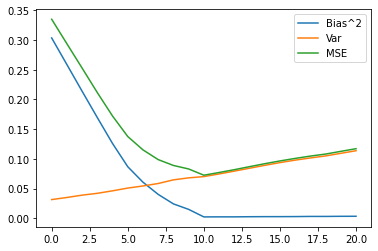

In [7]:
def getmean(l_all):
    l_all = np.array(l_all).T
    l = []
    for k in l_all:
        l.append(k.mean())
    return np.array(l)

n = 300
p = 20
p1 = int(p * 0.5)
sig_x = 0.2
sig_y = 3
M = 4000
M1 = 100
l1_all = []
l2_all = []
l3_all = []
for m1 in range(M1):
    x0 = [1 if i == 0 else random.gauss(0.05,0.05) for i in range(p + 1)]
    beta = np.mat([random.gauss(1,1) if i <= p1 else 0 for i in range(p + 1)]).T
    y0_e = np.matmul(x0, beta)
    bia = [[] for i in range(p + 1)]
    y0_hats = [[] for i in range(p + 1)]
    for m in range(int(M/M1)):
        y, x = y_real(beta,  n)
        re = np.matmul(x.T,x).I
        beta_hat = np.matmul(np.matmul(re,x.T),y)
        beta_hat_k = beta_hat
        for k in range(p + 1):
            y0_hat = np.matmul(x0, beta_hat_k)
            bi = float(y0_hat - y0_e)
            bia[p - k].append(bi)
            y0_hats[p - k].append(float(y0_hat))
            beta_hat_k[p - k] = 0

    bias = []
    mses = []
    for k in range(p + 1):
        y0_hat_l = np.array(y0_hats[k])
        bis = np.array(bia[k])
        biask = float(y0_hat_l.mean() - y0_e)
        bias.append(biask * biask)
        mse = bis * bis
        mses.append(mse.mean())

    l1 = np.array(bias)
    l3 = np.array(mses)
    l2 = l3 - l1
    l1_all.append(l1)
    l2_all.append(l2)
    l3_all.append(l3)

l1_f = getmean(l1_all)
l2_f = getmean(l2_all)
l3_f = getmean(l3_all)
T = np.array([x for x in range(p + 1)])
plt.plot(T, l1_f, label="Bias^2")
plt.plot(T, l2_f, label="Var")
plt.plot(T, l3_f, label="MSE")
plt.legend()
plt.show()

通过和前面图表的比较可以看出，一方面这种情况下得到的图表中的三条曲线不如beta和x0固定时得到的平滑。另一方面根据纵轴的显示，三种评价指标的值同等增大了一些。这可能是因为引入了更多的随机元素导致的。可以预测，如果进行足够多轮的随机模拟，也可以得到相对平滑的曲线。